
# Przygotowanie

Przygotowanie
Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko. {nr_albumu}_{imię}_{nazwisko}_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę TEAMS.

# Support Vector Machine

Jest to jeden z najbardziej rozpowszechnionych i wszechstronnych modeli uczenia maszynowego. Z jego uzyciem dokonac mozna klasyfikacji liniowej (SVC), nieliniowej jak i regresji (SVR). Na poniższej grafice przedstawione zostało działanie klasyfikatora.

![svc](svc.png)

Analizujac grafike dostrzec mozna dwie oddzielne klasy oddzielone za pomoca prostej. Widoczna linia ciagła rozdziela klasy, a przerywane linie oznaczają margines, czyli możliwe najdalsze oddalenie elementu (np. nowego) jaki zakwalifikowany
zostanie do danej klasy. Maszyny SVM czułe sa na skale danych, przed ich uzyciem zawsze powinna zostać przeprowadzona normalizacja danych (np. min-max, lub standaryzacja).

![svc_example](svc2.jpg)

Równowage pomiedzy marginesami możemy regulować za pomoca hipermarapetru
C. Mniejsze jego wartości poszerzają granice, jednocześnie wprowadzając
więcej jej naruszeń. Im margines jest szerszy, tym własciwosci generalizujace
jakie posiada klasyfikator będę większe. Mniejsza staje się podatność na przeuczenie
(ang. overfitting), ale zmniejsza się skuteczność klasyfikatora. Szukany jest
taki klasyfikator, który podzieli przestrzeń na dwa rozłaczne zbiory odpowiadajace
dwóm klasom, w możliwie optymalny sposób. Podejście opiera się na
znalezieniu granicy decyzyjnej.

Wektory nośne (Support vectors) są to obserwacje (data points), które wystepują najbliżej hiperpłaszczyzny. Punkty te, pomagają lepiej wyznaczyć linię separacji pomiędzy klasami poprzez obliczenie marginesów. Są to najbardziej znaczace obserwacje ze zbioru z punktu widzenia konstrukcji klasyfikatora.

Warto zaznaczyć, że za pomocą klasyfikatora SVC można klasyfikaować dane, które nie są linowo separowalne. Można to osiągnąć przez tzw "sztuczkę kernelową", dzięki czemu możliwe jest zmapowanie obserwacji do wielowymiarowej przestrzeni. Klasyfikator z biblioteki Sklearn posiada parametr *kernel*, który pozwala na zmianę jądra. Dodatkowo, parametr *gamma* pozwala na modyfikację działania samego kernela.

Warto zaznaczyć, że SVC dobrze nadaje się do niewielkich zbiorów danych, gdyż w przypadku dużej ilości staję się on mało wydajny.

Funkcja jaka jest minimalizowana podczas działania klasyfikatora wygląda następująco:

\begin{equation}
min C \sum^m_{i=1}[y^{(i)}cost_{1}(\theta^{T}x^{(i)}) - (1 - y^{(i)})cost_{0}(\theta^{T}x^{(i)})] + \frac{1}{2} \sum^{n}_{i=1}\theta^{2}_{j}
\end{equation}

## Zadanie 0 

Wczytanie danych ze zbioru oraz wizualizacja.

In [1]:
import pandas as pd
import numpy as np

data_input = pd.read_csv('./Ankieta.csv')
data_input.head()

,Waga,Wzrost,Plec
0,55,160,Kobieta
1,78,180,Mezczyzna
2,55,150,Kobieta
3,99,196,Mezczyzna
4,90,180,Mezczyzna


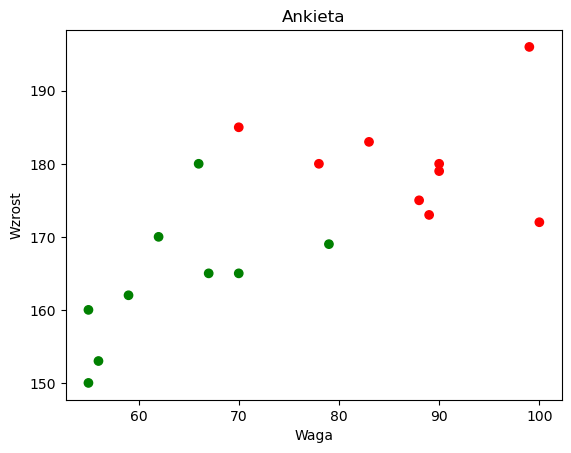

In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors

x = data_input['Plec'].map(lambda x: 1 if x == 'Kobieta' else 0)
y = data_input['Waga']
z = data_input['Wzrost']

data_input['Plec'] = data_input['Plec'].map(lambda x: 1 if x == 'Kobieta' else 0)

plt.scatter(y, z, c=x, cmap=colors.ListedColormap(['red', 'green']))
plt.xlabel('Waga')
plt.ylabel('Wzrost')
plt.title('Ankieta')
plt.show()

C:\Users\kamaz\AppData\Local\Temp\ipykernel_13472\1618543461.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data_input.hist(ax=ax)


array([[<Axes: title={'center': 'Waga'}>,
        <Axes: title={'center': 'Wzrost'}>],
       [<Axes: title={'center': 'Plec'}>, <Axes: >]], dtype=object)

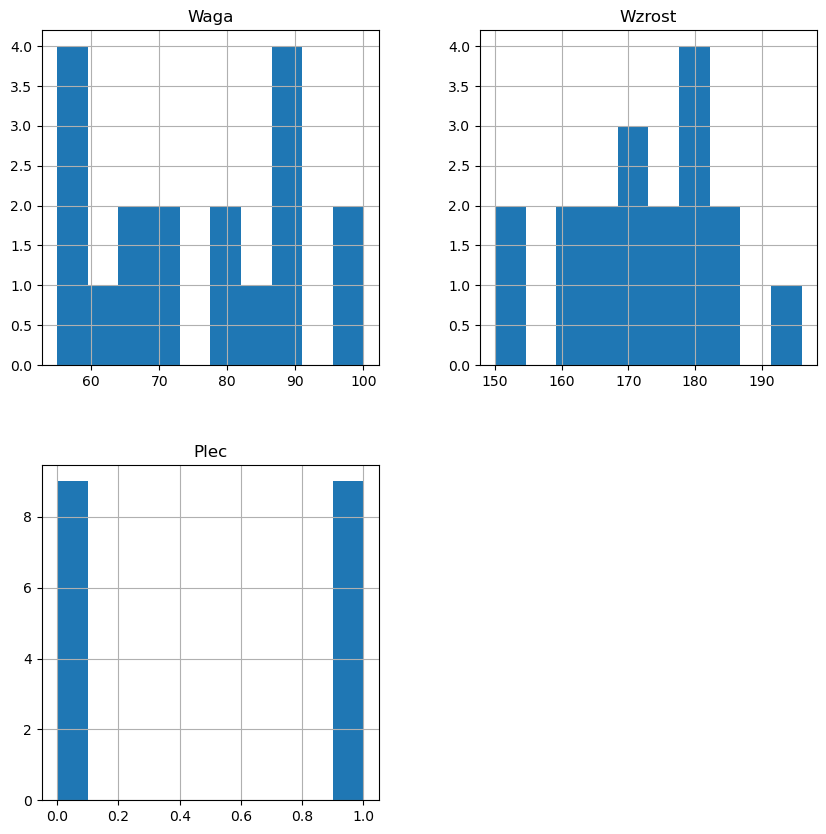

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data_input.hist(ax=ax)

<Axes: >

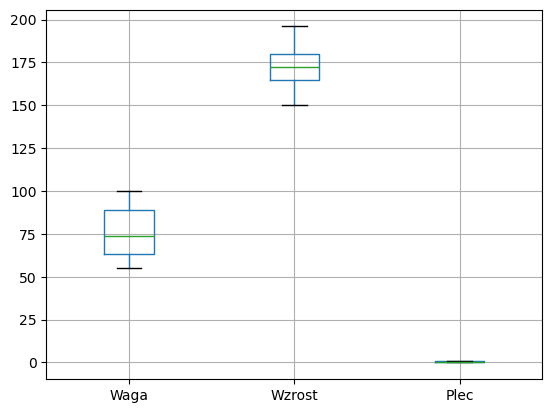

In [4]:
data_input.boxplot()

Na bazie wykresów box-plot można stwierdzić, że dane posiadają różniące się zakresy, co powoduje potrzebę ich skalowania. Warto zauważyć również, że rozkład klas w zbiorze jest równomierny (patrz: histogram)

## Zadanie 1

Proszę dokonać normalizacji zbioru danych za pomocą standaryzacji oraz narysować wykres box-plot dla wszystkich zmiennych. W jaki sposób zmieniły się dane? Co można powiedzieć o ich zakresach. W jakim celu dokonujemy normalizacji?

In [5]:
X = data_input[['Wzrost', 'Waga']]
X_standardized = (X - X.mean()) / X.std()
data_standardized = pd.concat([X_standardized, data_input['Plec']], axis=1)
data_standardized

,Wzrost,Waga,Plec
0,-1.032652,-1.345220,1
1,0.680503,0.176422,0
2,-1.889229,-1.345220,1
3,2.051027,1.565748,0
4,0.680503,0.970323,0
5,1.108792,-0.352845,0
6,-0.604363,-0.352845,1
7,-0.176074,-0.882112,1
8,-0.861336,-1.080587,1
9,0.252214,0.838006,0


<Axes: >

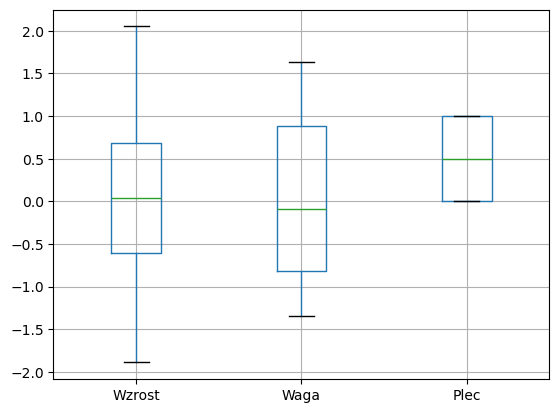

In [6]:
data_standardized.boxplot()

Standaryzacja danych polega na przekształceniu ich do postaci o średniej równej 0 i odchyleniu standardowym równym około 1. Dzięki temu wszystkie cechy są w tym samym skali, co pozwala na lepsze porównanie ich wpływów na wynik modelu. W przypadku danych wzrostu i wagi, standaryzacja sprawia, że obie zmienne mają podobne zakresy wartości, co poprawia wydajność algorytmów uczenia maszynowego poprzez eliminację dominacji jednej cechy nad drugą ze względu na różnice w skali.

## Zadanie 2

W tym zadaniu należy dokonać podziału zbioru danych na uczący oraz testowy. Zbiór uczący będzie służył do treningu klasyfikatora, a testowy do obliczenia ostatecznej skuteczności klasyfikacji. Prosze, by 80% próbek znalazło się w zbiorze uczącym, a 20% w testowym. Proszę zadbać o odpowiednią inicjalizacje generatora pseudolosowego

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_input, test_size=0.2, random_state=42, stratify=data_input['Plec'])
train_standardized, test_standardized = train_test_split(data_standardized, test_size=0.2, random_state=42, stratify=data_standardized['Plec'])

In [8]:
train_standardized.describe()

,Wzrost,Waga,Plec
count,14.000000,14.000000,14.000000
mean,-0.084298,-0.022053,0.500000
std,1.068526,1.026562,0.518875
min,-1.889229,-1.345220,0.000000
25%,-0.797093,-1.030968,0.000000
50%,-0.047588,0.209502,0.500000
75%,0.659089,0.887625,1.000000
max,2.051027,1.565748,1.000000


In [9]:
test_standardized.describe()

,Wzrost,Waga,Plec
count,4.000000,4.000000,4.00000
mean,0.295043,0.077185,0.50000
std,0.754891,1.043962,0.57735
min,-0.604363,-0.617478,0.00000
25%,-0.154660,-0.419003,0.00000
50%,0.337872,-0.352845,0.50000
75%,0.787575,0.143343,1.00000
max,1.108792,1.631907,1.00000


## Zadanie 3

W tym zadaniu należy dokonać klasyfikacji danych za pomocą klasyfikatora SVC. Proszę obliczyć skuteczność klasyfikatora na danych po, oraz przed standaryzacją i porównać wyniki.

In [10]:
from sklearn.svm import SVC

svc_model = SVC(kernel='linear')
svc_model.fit(train[['Wzrost', 'Waga']], train['Plec'])
svc_model.score(test[['Wzrost', 'Waga']], test['Plec'])

1.0

In [11]:
svc_model_standardized = SVC(kernel='linear')
svc_model_standardized.fit(train_standardized[['Wzrost', 'Waga']], train_standardized['Plec'])
svc_model_standardized.score(test_standardized[['Wzrost', 'Waga']], test_standardized['Plec'])

0.75

In [21]:
def plot_decision_boundary(model, X, y, ax=None, show=True):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_xlabel('Wzrost')
    ax.set_ylabel('Waga')
    ax.set_title('Decision Boundary')
    if show:
        plt.show()

d:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


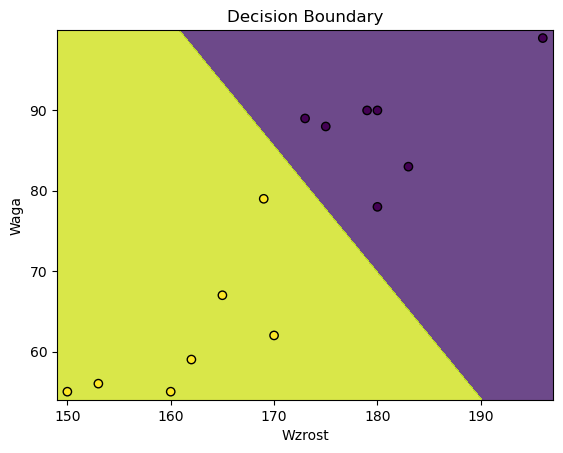

In [13]:
plot_decision_boundary(svc_model, train[['Wzrost', 'Waga']], train['Plec'])

d:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


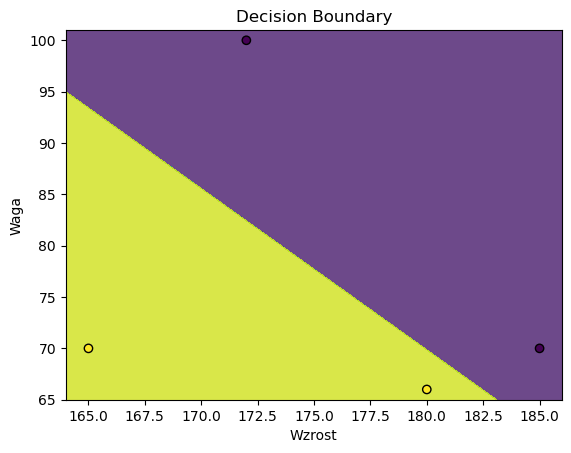

In [14]:
plot_decision_boundary(svc_model, test[['Wzrost', 'Waga']], test['Plec'])

d:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


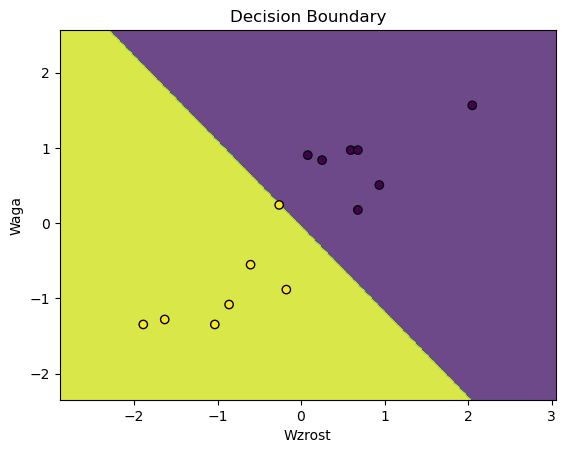

In [15]:
plot_decision_boundary(svc_model_standardized, train_standardized[['Wzrost', 'Waga']], train_standardized['Plec'])

d:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


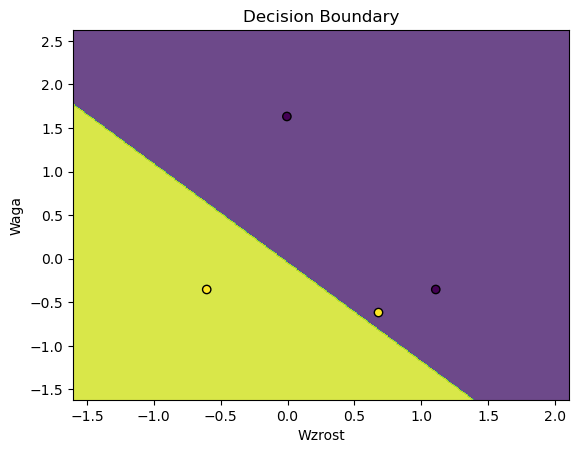

In [16]:
plot_decision_boundary(svc_model_standardized, test_standardized[['Wzrost', 'Waga']], test_standardized['Plec'])

SVC po standaryzacji danych osiągnął gorszą skuteczność niż SVC bez standaryzacji danych. Ze względu na różnicę w skali cech, standaryzacja mogła niekorzystnie wpłynąć na działanie klasyfikatora SVC w tym konkretnym przypadku (mniejsze odstępy między punktami danych mogły utrudnić znalezienie optymalnej granicy decyzyjnej). Oba modele osiągnęły jednak wysoką skuteczność (100% i 75% dla 4 obserwacji w zbiorze testowym - różnica jednej, źle zaklasyfikowane obserwacji), co sugeruje, że cechy Wzrost i Waga są istotne dla klasyfikacji płci w tym zbiorze danych. Użyto kernel liniowy, ze względu na liniową separowalność danych.

## Zadanie 4

Proszę dobrać odpowiedni parametr C (proszę spróbować z zakresu -1, 1 z krokiem co 0.1). Dla każdego C proszę wyrysować hiperpłaszczyznę utworzoną przez klasyfikator (w formie animimacji, lub inaczej). Proszę przedstawić na wykresie jak zmieniała się skuteczność klasyfikatora w zależności od parametru C. Jakie wnioski można wyciągnąć? Jak wpływa parametr C na wynik?

d:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\kamaz\AppData\Local\Temp\ipykernel_13472\1768994976.py:31: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  artists.append(list(contour.collections) + [scatter, title])
d:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\kamaz\AppData\Local\Temp\ipykernel_13472\1768994976.py:31: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  artists.append(list(contour.collections) + [scatter, title])
d:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, b

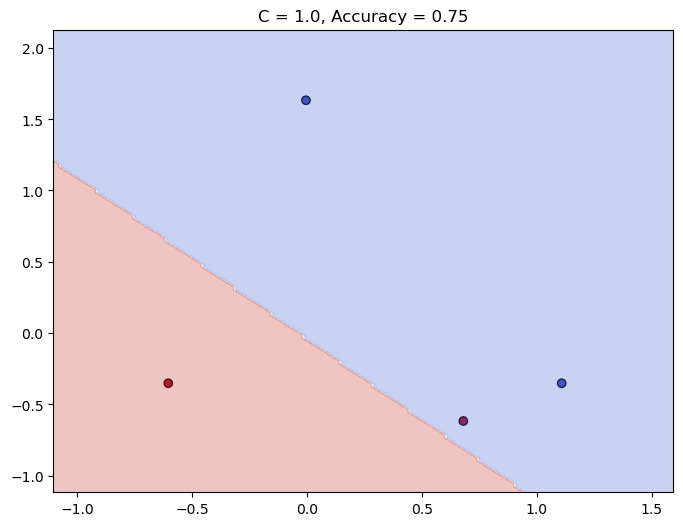

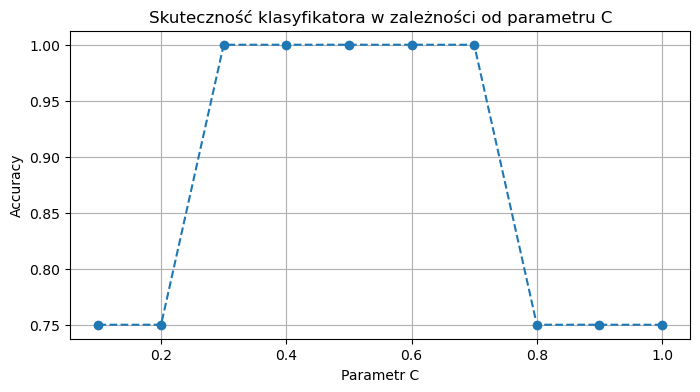

In [25]:
import matplotlib.animation as animation

C_values = np.arange(0.1, 1.1, 0.1)

fig, ax = plt.subplots(figsize=(8, 6))
scores = []
artists = []

for C in C_values:
    svc_model = SVC(kernel='linear', C=C)
    svc_model.fit(train_standardized[['Wzrost', 'Waga']], train_standardized['Plec'])
    
    score = svc_model.score(test_standardized[['Wzrost', 'Waga']], test_standardized['Plec'])
    scores.append(score)
    
    X = test_standardized[['Wzrost', 'Waga']]
    y = test_standardized['Plec']
    x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
    y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = svc_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    contour = ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    title = ax.text(0.5, 1.02, f"C = {C:.1f}, Accuracy = {score:.2f}", 
                    transform=ax.transAxes, ha="center", fontsize=12)
    
    artists.append(list(contour.collections) + [scatter, title])

ani = animation.ArtistAnimation(fig, artists, interval=500, blit=True)
ani.save('decision_boundary.gif', writer='pillow')
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(C_values, scores, marker='o', linestyle='--')
plt.title('Skuteczność klasyfikatora w zależności od parametru C')
plt.xlabel('Parametr C')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

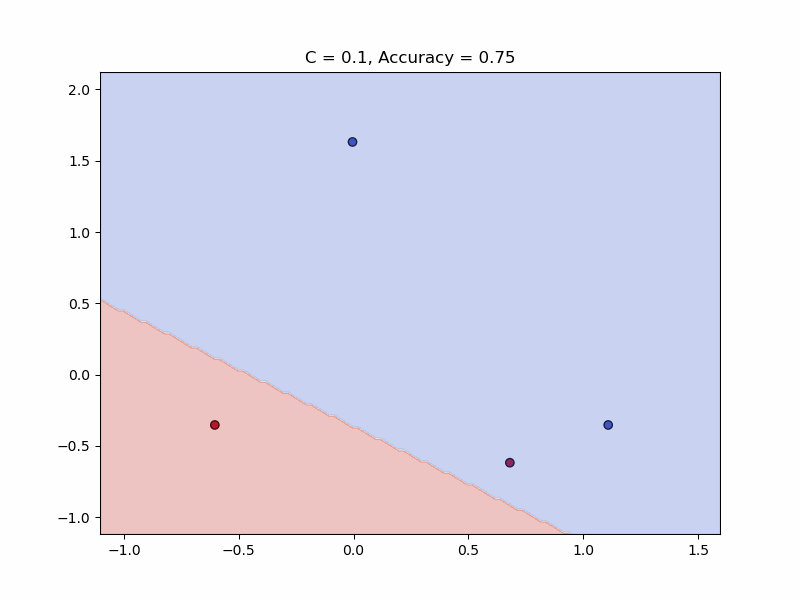

In [27]:
from IPython.display import Image
Image(filename='decision_boundary.gif')

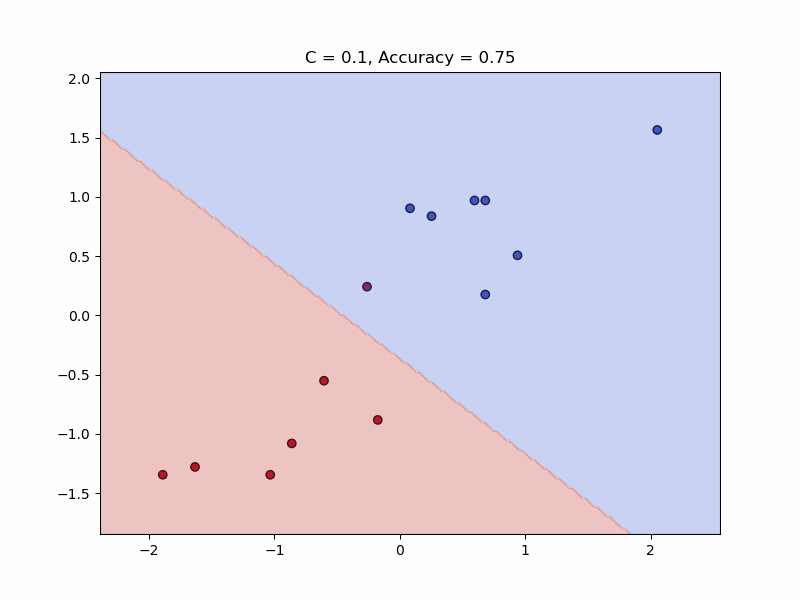

In [29]:
from IPython.display import Image
Image(filename='decision_boundary_train.gif')

Parametr C (testowany w zakresie od 0.1 do 1.0 - nie może być niedodatni) w SVC kontroluje kompromis między maksymalizacją marginesu a minimalizacją błędów klasyfikacji. Niższe wartości C pozwalają na większy margines kosztem większej liczby błędów, co może prowadzić do lepszej generalizacji na danych testowych. Wyższe wartości C starają się klasyfikować wszystkie punkty treningowe poprawnie. Na powyższych wykresach można zauważyć, że zbyt niskie lub zbyt wysokie wartości C mogą prowadzić do gorszej skuteczności klasyfikatora dla danych testowych ze względu na underfitting lub overfitting.

Wnioski: Optymalna wartość parametru C powinna być dobrana tak, aby zbalansować dokładność na danych treningowych i testowych, unikając zarówno nadmiernego dopasowania (overfitting), jak i niedopasowania (underfitting).

## Zadanie 5

Proszę dokonać pomiaru czasu wykonania algorytmu dla min. 2 różnych kerneli

RBF Kernel Czas Treningu: 0.0067 sekund, Dokładność: 1.0000
Sigmoid Kernel Czas Treningu: 0.0050 sekund, Dokładność: 1.0000


d:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


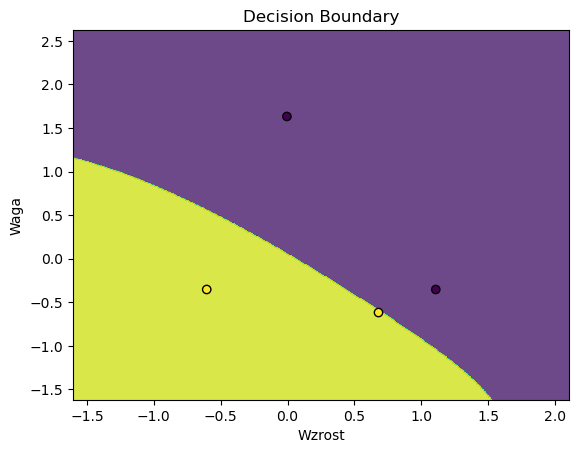

d:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


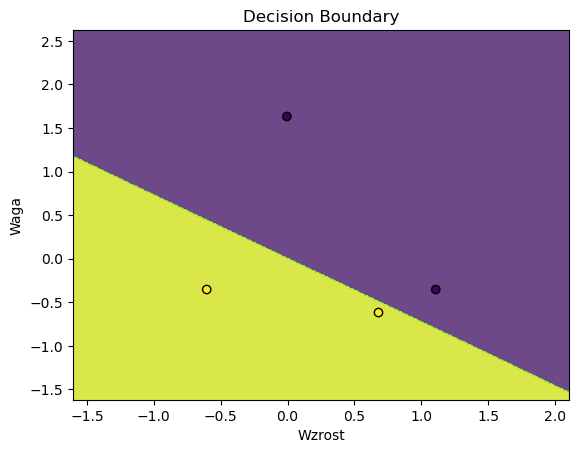

In [ ]:
import time
start_time = time.time()
svc_model_rbf = SVC(kernel='rbf')
svc_model_rbf.fit(train_standardized[['Wzrost', 'Waga']], train_standardized['Plec'])
end_time = time.time()
print(f"RBF Kernel Czas Treningu: {end_time - start_time:.4f} sekund, Dokładność: {svc_model_rbf.score(test_standardized[['Wzrost', 'Waga']], test_standardized['Plec']):.4f}")

start_time = time.time()
svc_model_sigmoid = SVC(kernel='sigmoid')
svc_model_sigmoid.fit(train_standardized[['Wzrost', 'Waga']], train_standardized['Plec'])
end_time = time.time()
print(f"Sigmoid Kernel Czas Treningu: {end_time - start_time:.4f} sekund, Dokładność: {svc_model_sigmoid.score(test_standardized[['Wzrost', 'Waga']], test_standardized['Plec']):.4f}")

plot_decision_boundary(svc_model_rbf, test_standardized[['Wzrost', 'Waga']], test_standardized['Plec'])
plot_decision_boundary(svc_model_sigmoid, test_standardized[['Wzrost', 'Waga']], test_standardized['Plec'])

### Dla zbioru *dataR2* proszę dokonać podobnej analizy danych. Opis zbioru: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

## Zadanie 6

Proszę zwizualizować dane dla 2 dowolnych zmiennych ze zbioru

In [35]:
data_R2 = pd.read_csv('./dataR2.csv')
data_R2.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


d:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_

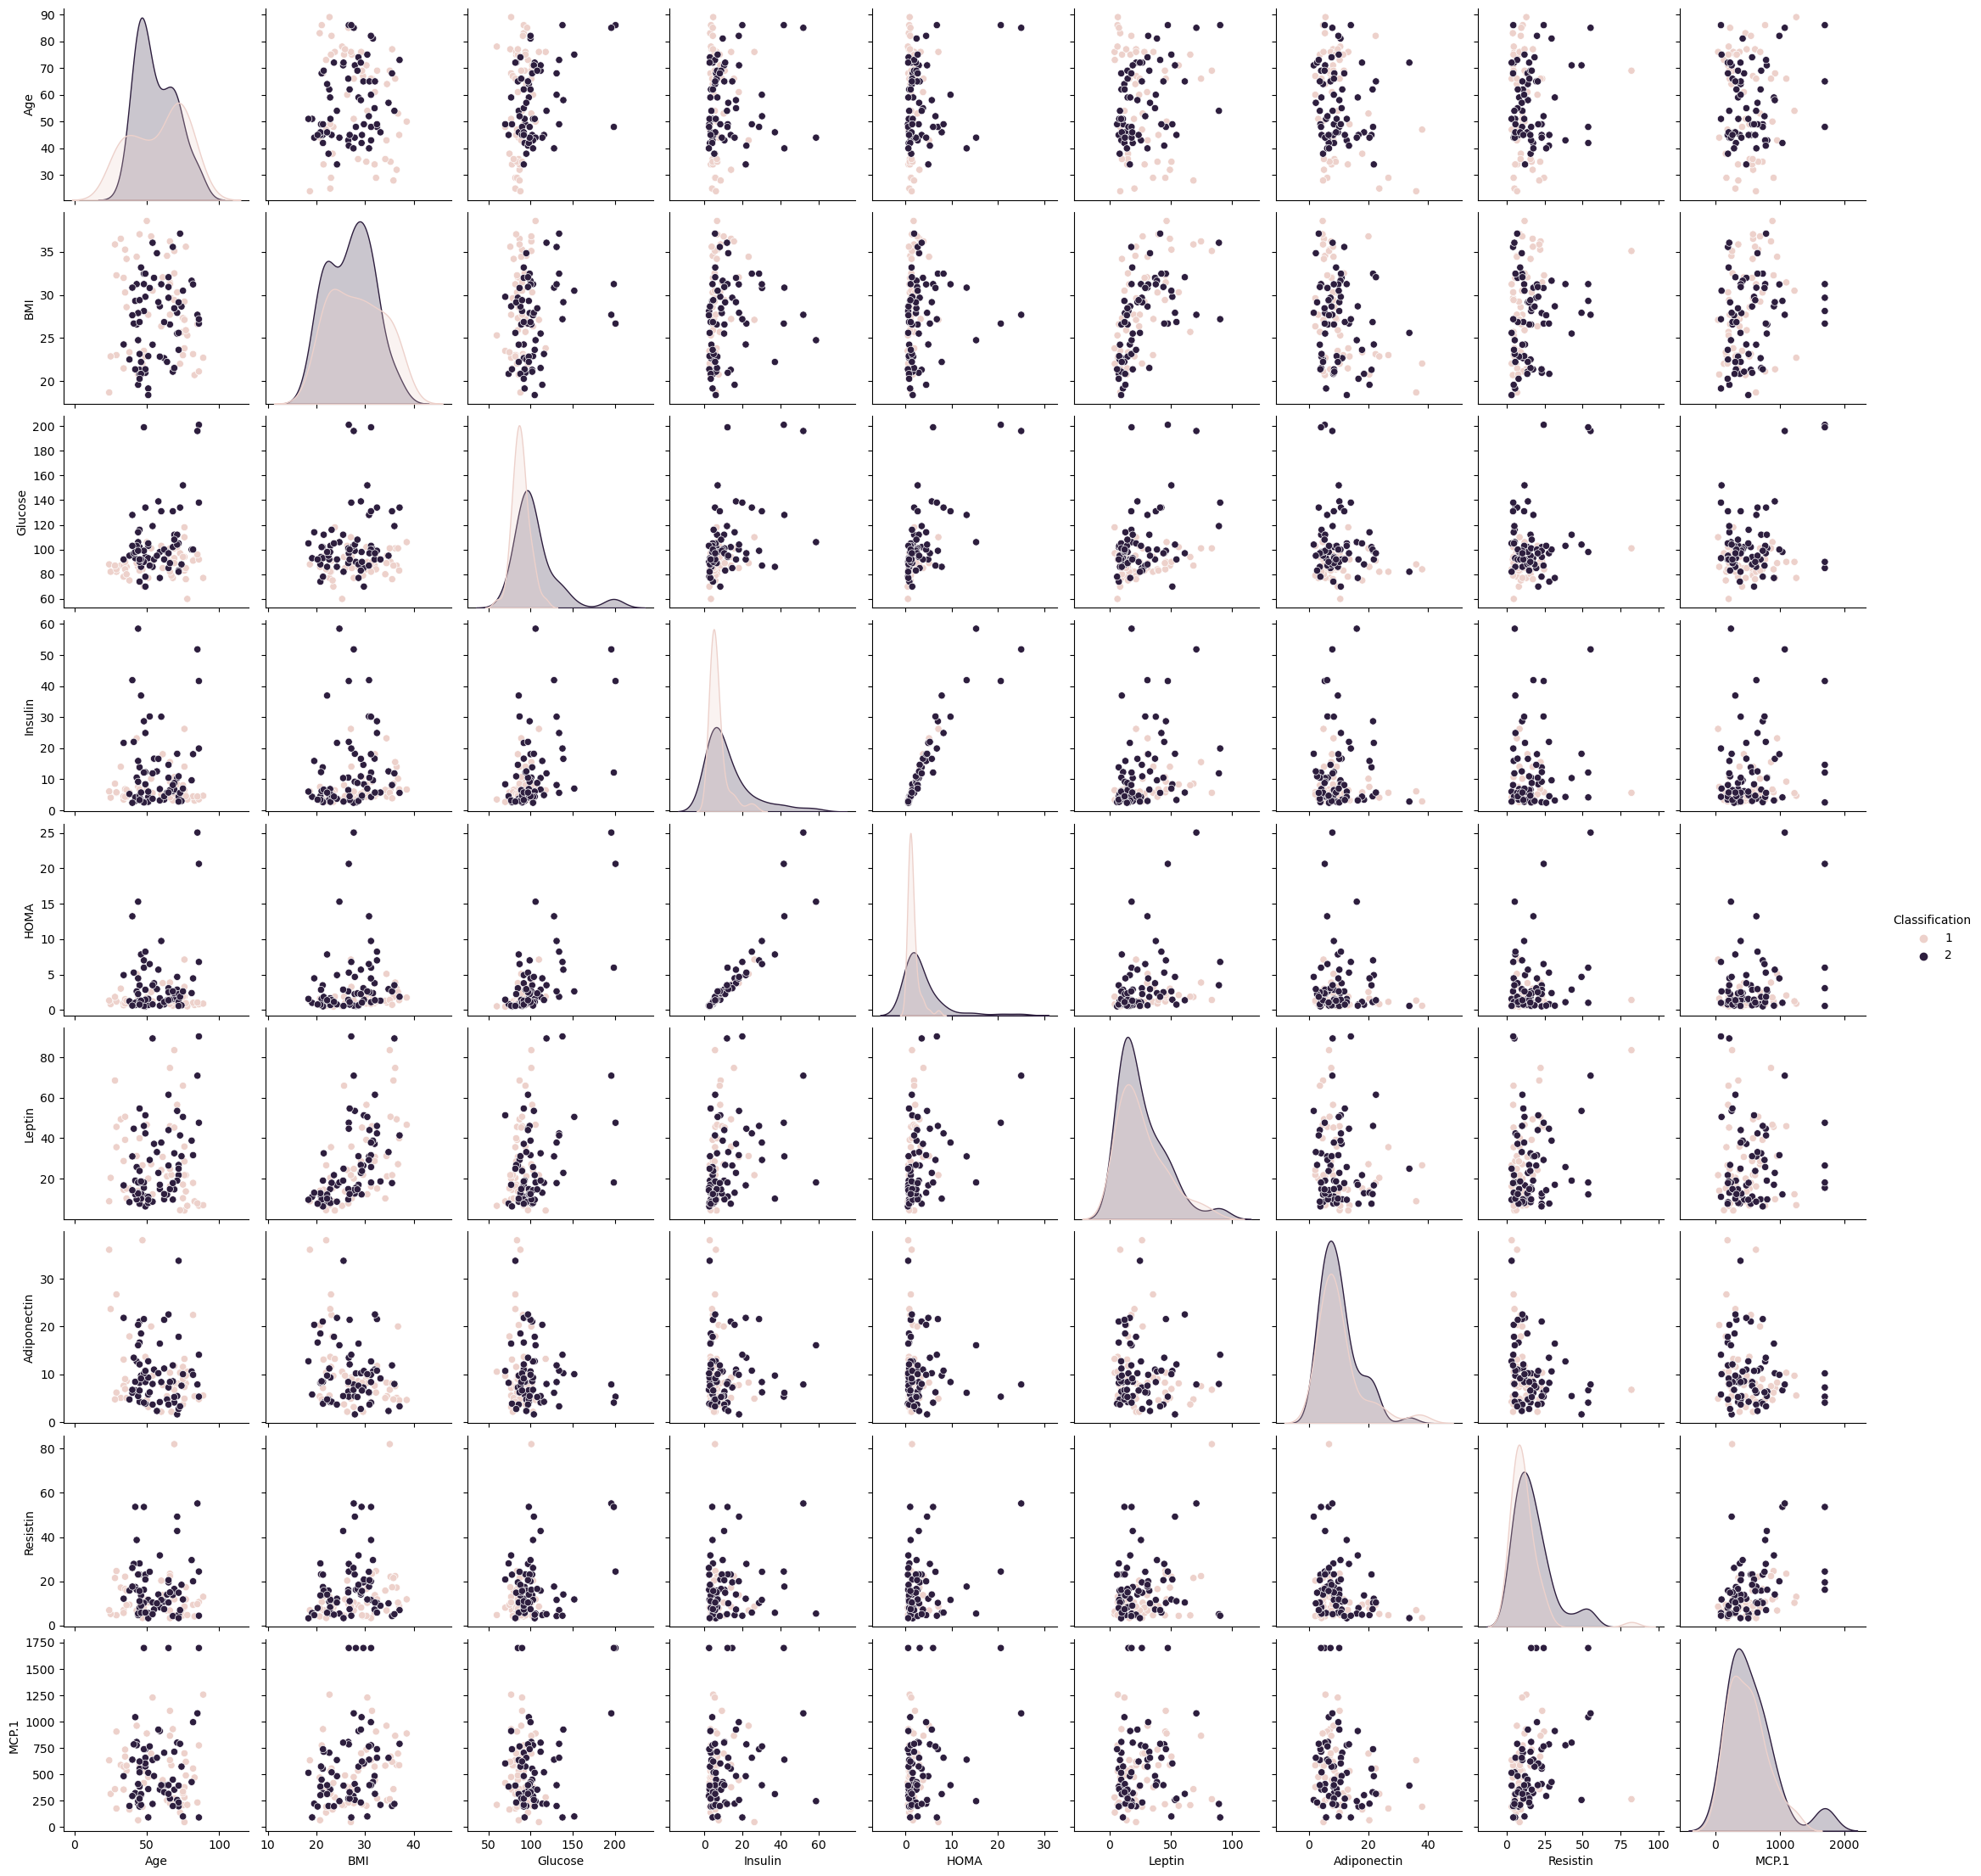

In [ ]:
import seaborn as sns
sns.pairplot(data_R2, hue='Classification', diag_kind='kde')

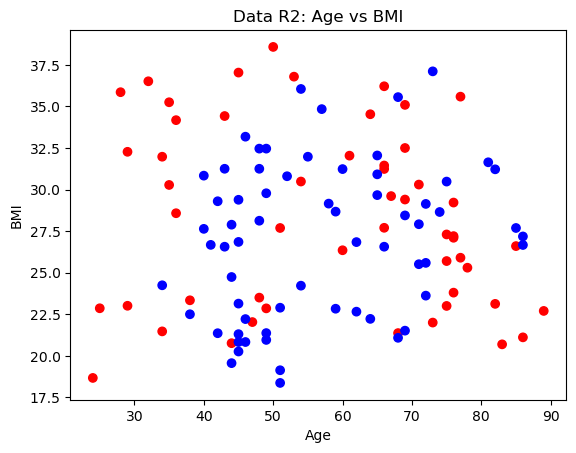

In [ ]:
X = data_R2[['Age', 'BMI']]
y = data_R2['Classification']

plt.scatter(X['Age'], X['BMI'], c=y, cmap=colors.ListedColormap(['red', 'blue']))
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Data R2: Age vs BMI')
plt.show()

# niebieskie bardziej skupione w środku, czerwone bardziej na zewnątrz - funckja radialna ?

<Axes: >

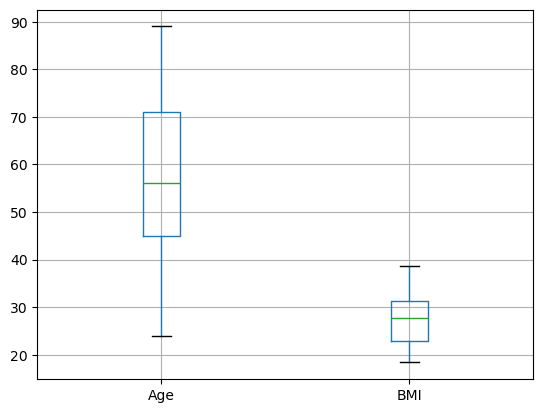

In [41]:
X.boxplot()

In [45]:
y.value_counts() / len(y) * 100

Classification
2    55.172414
1    44.827586
Name: count, dtype: float64

## Zadanie 7

Proszę dokonać standaryzacji danych

<Axes: >

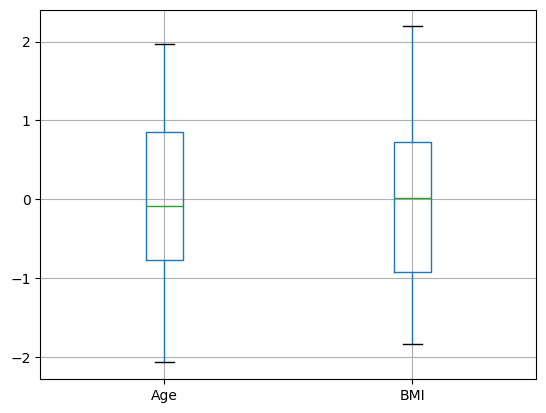

In [40]:
X_standardized = (X - X.mean()) / X.std()
X_standardized.boxplot()

## Zadanie 8

Trenowanie klasyfikatora. Proszę dokonać treningu klasyfikatora na zbiorze treningowym (X_train, y_train). Proszę użyć różnych wartości parametru C, gamma oraz kernel. Pełna dokumentacja klasyfikatora: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html Wyniki proszę podsumować na odpowiednim wykresie lub tabeli. Test skuteczności klasyfikatora proszę dokonać na zbiorze testowym (X_test, y_test).

In [48]:
from sklearn.model_selection import train_test_split

data_standardized = pd.concat([X_standardized, y], axis=1)

train_standardized, test_standardized = train_test_split(data_standardized, test_size=0.2, random_state=42, stratify=data_standardized['Classification'])

In [77]:
C_values = [0.1, 0.5, 1.0, 1.5, 2.0]
gamma_values = [0.1, 0.5, 1.0, 1.5, 2.0]
kernels = ['sigmoid', 'rbf', 'poly']
poly_degrees = [2, 3, 4]

results = pd.DataFrame(columns=['Kernel', 'C', 'Gamma', 'Accuracy'])

for kernel in kernels:
    for C in C_values:
        for gamma in gamma_values:
            if kernel == 'poly':
                for degree in poly_degrees:
                    svc_model = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree)
                    svc_model.fit(train_standardized[['Age', 'BMI']], train_standardized['Classification'])
                    accuracy = svc_model.score(test_standardized[['Age', 'BMI']], test_standardized['Classification'])
                    results = pd.concat([results, pd.DataFrame({'Kernel': [str(kernel)+f'_{degree}'], 'C': [C], 'Gamma': [gamma], 'Accuracy': [accuracy]})], ignore_index=True)
                    print(f'Kernel: {kernel}, C: {C}, gamma: {gamma}, degree: {degree}, Accuracy: {accuracy:.4f}')
            else:
                svc_model = SVC(kernel=kernel, C=C, gamma=gamma)
                svc_model.fit(train_standardized[['Age', 'BMI']], train_standardized['Classification'])
                accuracy = svc_model.score(test_standardized[['Age', 'BMI']], test_standardized['Classification'])
                results = pd.concat([results, pd.DataFrame({'Kernel': [kernel], 'C': [C], 'Gamma': [gamma], 'Accuracy': [accuracy]})], ignore_index=True)
                print(f'Kernel: {kernel}, C: {C}, gamma: {gamma}, Accuracy: {accuracy:.4f}')

C:\Users\kamaz\AppData\Local\Temp\ipykernel_13472\3923685538.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({'Kernel': [kernel], 'C': [C], 'Gamma': [gamma], 'Accuracy': [accuracy]})], ignore_index=True)


Kernel: sigmoid, C: 0.1, gamma: 0.1, Accuracy: 0.5417
Kernel: sigmoid, C: 0.1, gamma: 0.5, Accuracy: 0.5417
Kernel: sigmoid, C: 0.1, gamma: 1.0, Accuracy: 0.5417
Kernel: sigmoid, C: 0.1, gamma: 1.5, Accuracy: 0.5417
Kernel: sigmoid, C: 0.1, gamma: 2.0, Accuracy: 0.5417
Kernel: sigmoid, C: 0.5, gamma: 0.1, Accuracy: 0.5417
Kernel: sigmoid, C: 0.5, gamma: 0.5, Accuracy: 0.5417
Kernel: sigmoid, C: 0.5, gamma: 1.0, Accuracy: 0.5833
Kernel: sigmoid, C: 0.5, gamma: 1.5, Accuracy: 0.5417
Kernel: sigmoid, C: 0.5, gamma: 2.0, Accuracy: 0.5000
Kernel: sigmoid, C: 1.0, gamma: 0.1, Accuracy: 0.5417
Kernel: sigmoid, C: 1.0, gamma: 0.5, Accuracy: 0.5000
Kernel: sigmoid, C: 1.0, gamma: 1.0, Accuracy: 0.5417
Kernel: sigmoid, C: 1.0, gamma: 1.5, Accuracy: 0.5000
Kernel: sigmoid, C: 1.0, gamma: 2.0, Accuracy: 0.5000
Kernel: sigmoid, C: 1.5, gamma: 0.1, Accuracy: 0.5417
Kernel: sigmoid, C: 1.5, gamma: 0.5, Accuracy: 0.5833
Kernel: sigmoid, C: 1.5, gamma: 1.0, Accuracy: 0.5417
Kernel: sigmoid, C: 1.5, gam

Best Parameters: rbf, C: 2.0, gamma: 2.0, Best Accuracy: 0.7917


d:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


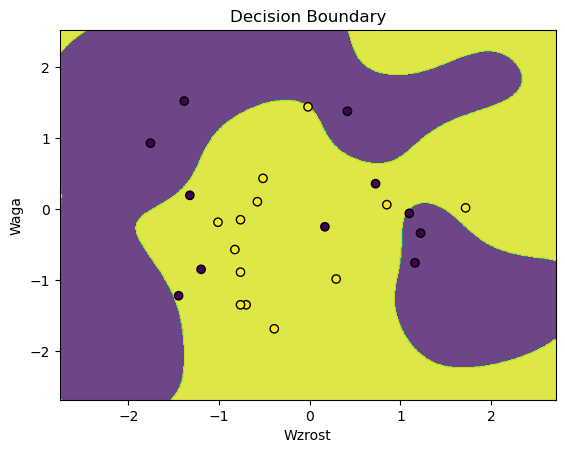

d:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


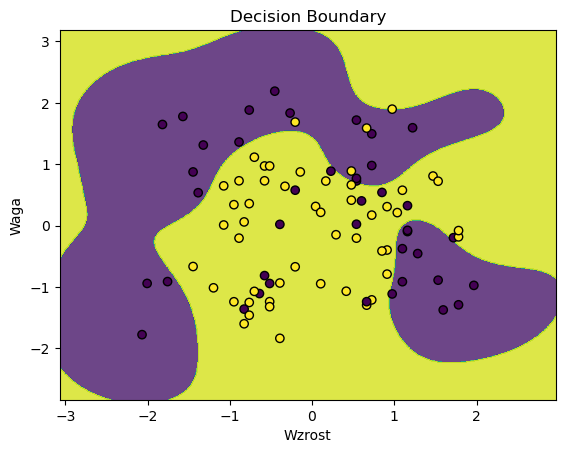

In [ ]:
best_params = results.loc[results['Accuracy'].idxmax()]
best_accuracy = best_params['Accuracy']
print(f'Best Parameters: {best_params["Kernel"]}, C: {best_params["C"]}, gamma: {best_params["Gamma"]}, Best Accuracy: {best_accuracy:.4f}')

svc_model = SVC(kernel=best_params['Kernel'], C=best_params['C'], gamma=best_params['Gamma'])
svc_model.fit(train_standardized[['Age', 'BMI']], train_standardized['Classification'])
plot_decision_boundary(svc_model, test_standardized[['Age', 'BMI']], test_standardized['Classification'])
plot_decision_boundary(svc_model, train_standardized[['Age', 'BMI']], train_standardized['Classification'])

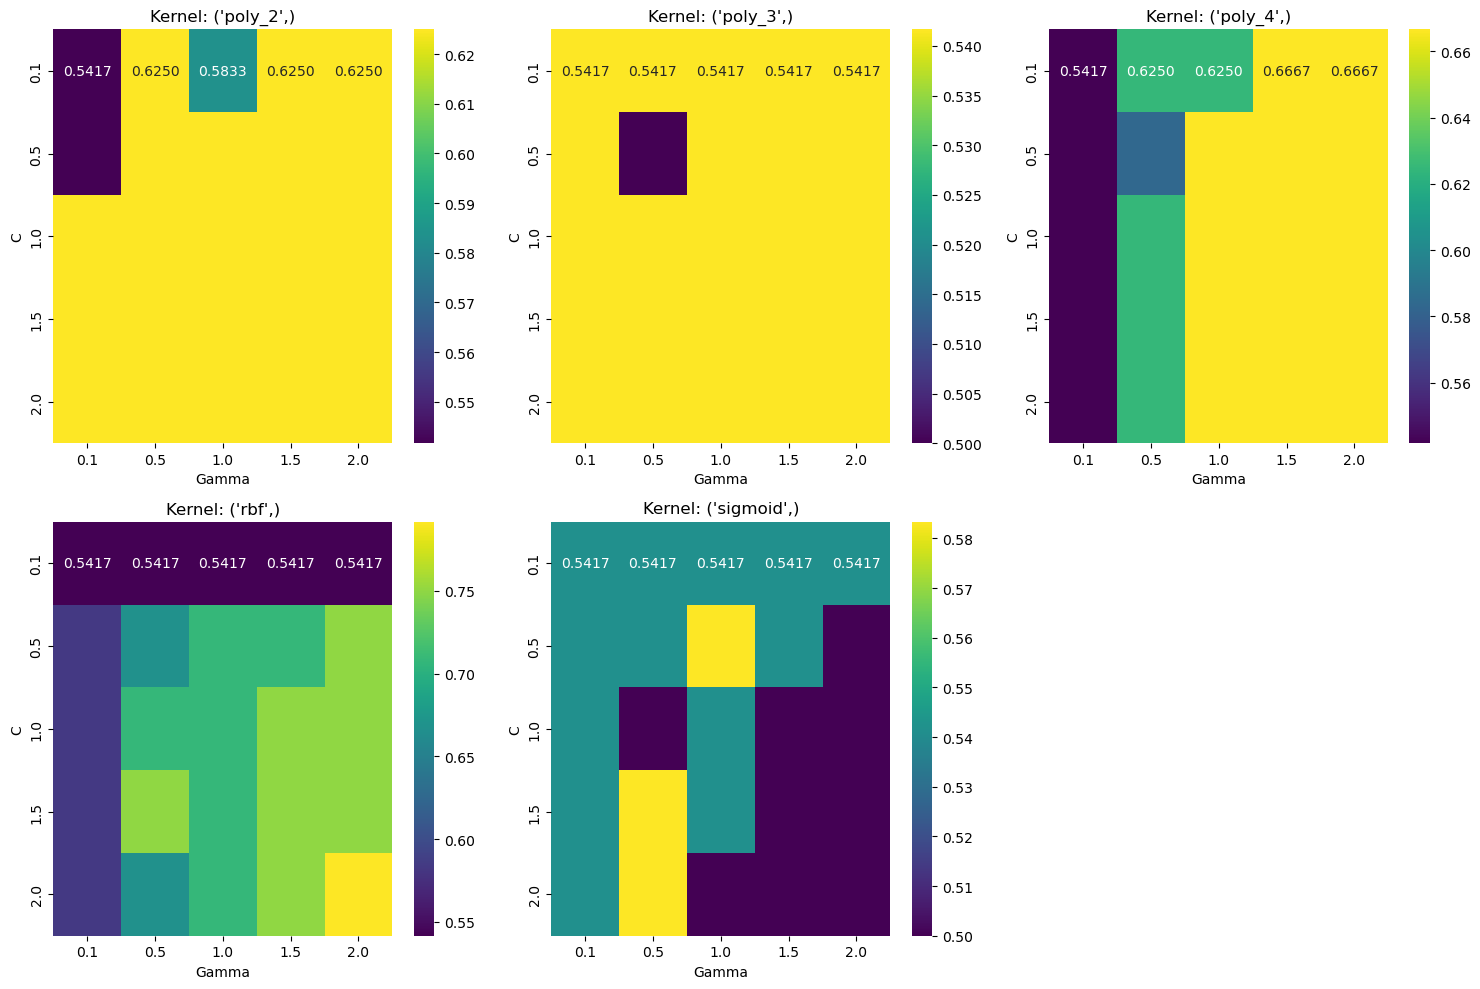

In [81]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes_flat = axes.flatten()

results_grouped = results.groupby(['Kernel'])

for i, (kernel, group) in enumerate(results_grouped):
    if i >= len(axes_flat):
        break
        
    ax = axes_flat[i]
    pivot_table = group.pivot(index='C', columns='Gamma', values='Accuracy')
    sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap='viridis', ax=ax)
    
    ax.set_title(f'Kernel: {kernel}')
    ax.set_xlabel('Gamma')
    ax.set_ylabel('C')

for j in range(i + 1, len(axes_flat)):
    axes_flat[j].set_visible(False)

plt.tight_layout()
plt.show()

Wnioski:
- jądro rbf osiagnęło najwyższą skuteczność (zgodnie z oczekiwaniem) 79% dla C: 2.0, gamma: 2.0
- rbf jest też najbardziej czuły na parametry, najlepsze parametry znajdują się w prawym dolnym rogu heatmapy, co sugeruje, że dalsze zwiększanie tych wartości w kolejnych testach może przynieść jeszcze lepsze rezultaty
- sigmoid i poly_3 osiągają najniższe wyniki (nie przekraczają 60%) - skuteczność zbliżona do losowego klasyfikatora, niedopasowane do struktury geometrycznej 
- jądra poly nie reagują zbytnio na zmianę parametrów, są stabilne

## Zadanie 9

Należy wyznaczyć macierze pomyłek dla klasyfikatora. Proszę dokonać wizualizacji wraz z kolorami na wykresie. Przykłady: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

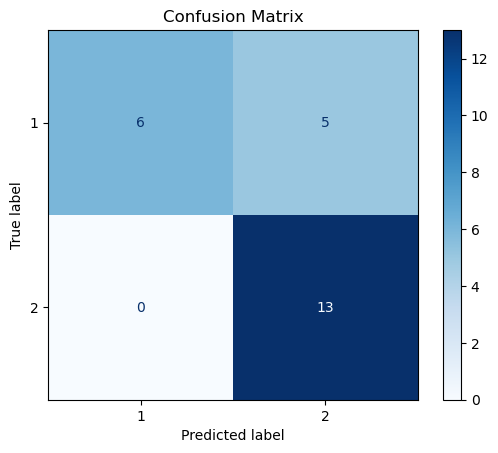

In [85]:
from sklearn.metrics import ConfusionMatrixDisplay

svc_model = SVC(kernel=best_params['Kernel'], C=best_params['C'], gamma=best_params['Gamma'])
svc_model.fit(train_standardized[['Age', 'BMI']], train_standardized['Classification'])

disp = ConfusionMatrixDisplay.from_estimator(
    svc_model,
    test_standardized[['Age', 'BMI']],
    test_standardized['Classification'],
    #display_labels=svc_model.classes_,
    cmap=plt.cm.Blues,
)
disp.ax_.set_title('Confusion Matrix')
plt.show()

1 = Healthy controls
2 = Patients

Wszyscy chorzy pacjenci zostali poprawnie zaklasyfikowani (maksymalna czułość - ważne dla modeli medycznych), jednak odbyło się to kosztem niskiej precyzji dla osób zdrowych (6 na 11 poprawnie zaklasyfikowanych - niska swoistość, granica decyzyjności przesunięta w stronę diagnozowania choroby).